<h1> Adjusting the learning rate </h1>

As $\alpha = 0.0001$ works a lot better than 0.001 I want to try 0.00001 too.

In [1]:
import myfunctions as mf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
from scipy.optimize import curve_fit
import time
import random

In [2]:
# load data
rootfile = uproot.open("./stage1_clusters_bigdata.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
clusters5x5, coord, ind_del = mf.form_cluster(xMC, yMC, EMC)
clusters = clusters5x5.reshape((clusters5x5.shape[0], 25))

This took  141.00133872032166 s


In [4]:
# cut data and from trainings and test data
xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri, clusters_t, clusters_v, coord_t, coord_v = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit, ind_del, clusters, coord)

In [5]:
# prep data
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

<h2> The network - $\alpha = 0.00001$ </h2>

As always:

In [6]:
model1 = keras.Sequential([layers.Input(shape=(25)),
                         layers.LayerNormalization(axis=1),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model1.summary()
model1.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization (LayerNo (None, 25)                50        
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [7]:
a = time.time()
fit_hist = model1.fit(clusters_t, training, batch_size=50, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
10353/10353 [==============================] - 10s 923us/step - loss: 681.2118 - val_loss: 2.4017
Epoch 2/200
10353/10353 [==============================] - 9s 912us/step - loss: 0.8815 - val_loss: 0.3698
Epoch 3/200
10353/10353 [==============================] - 9s 915us/step - loss: 0.2770 - val_loss: 0.2273
Epoch 4/200
10353/10353 [==============================] - 9s 909us/step - loss: 0.1772 - val_loss: 0.1567
Epoch 5/200
10353/10353 [==============================] - 9s 916us/step - loss: 0.1257 - val_loss: 0.1152
Epoch 6/200
10353/10353 [==============================] - 9s 912us/step - loss: 0.0952 - val_loss: 0.0897
Epoch 7/200
10353/10353 [==============================] - 9s 912us/step - loss: 0.0751 - val_loss: 0.0736
Epoch 8/200
10353/10353 [==============================] - 9s 915us/step - loss: 0.0619 - val_loss: 0.0619
Epoch 9/200
10353/10353 [==============================] - 9s 910us/step - loss: 0.0523 - val_loss: 0.0524
Epoch 10/200
10353/10353 [========

10353/10353 [==============================] - 9s 903us/step - loss: 0.0067 - val_loss: 0.0070
Epoch 77/200
10353/10353 [==============================] - 9s 901us/step - loss: 0.0066 - val_loss: 0.0063
Epoch 78/200
10353/10353 [==============================] - 9s 903us/step - loss: 0.0066 - val_loss: 0.0068
Epoch 79/200
10353/10353 [==============================] - 9s 901us/step - loss: 0.0065 - val_loss: 0.0062
Epoch 80/200
10353/10353 [==============================] - 9s 903us/step - loss: 0.0065 - val_loss: 0.0072
Epoch 81/200
10353/10353 [==============================] - 9s 905us/step - loss: 0.0064 - val_loss: 0.0061
Epoch 82/200
10353/10353 [==============================] - 9s 901us/step - loss: 0.0064 - val_loss: 0.0110
Epoch 83/200
10353/10353 [==============================] - 9s 900us/step - loss: 0.0063 - val_loss: 0.0065
Epoch 84/200
10353/10353 [==============================] - 9s 901us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 85/200
10353/10353 [===============

10353/10353 [==============================] - 9s 884us/step - loss: 0.0047 - val_loss: 0.0044
Epoch 152/200
10353/10353 [==============================] - 9s 890us/step - loss: 0.0046 - val_loss: 0.0042
Epoch 153/200
10353/10353 [==============================] - 9s 890us/step - loss: 0.0046 - val_loss: 0.0042
Epoch 154/200
10353/10353 [==============================] - 9s 889us/step - loss: 0.0046 - val_loss: 0.0045
Epoch 155/200
10353/10353 [==============================] - 9s 883us/step - loss: 0.0046 - val_loss: 0.0044
Epoch 156/200
10353/10353 [==============================] - 9s 889us/step - loss: 0.0046 - val_loss: 0.0042
Epoch 157/200
10353/10353 [==============================] - 9s 885us/step - loss: 0.0046 - val_loss: 0.0044
Epoch 158/200
10353/10353 [==============================] - 9s 887us/step - loss: 0.0045 - val_loss: 0.0042
Epoch 159/200
10353/10353 [==============================] - 9s 889us/step - loss: 0.0045 - val_loss: 0.0042
Epoch 160/200
10353/10353 [======

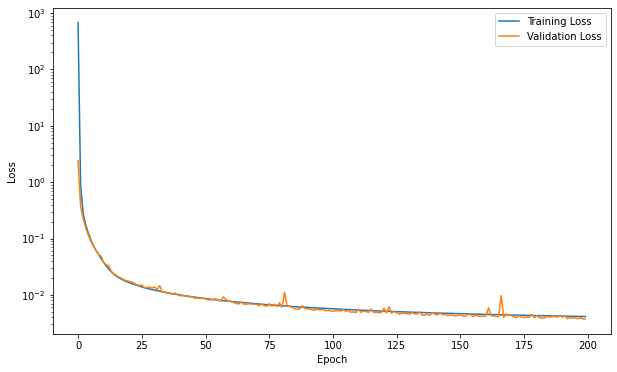

In [8]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [9]:
output = model1.predict(clusters_v)

In [17]:

def gaus(x, mu, sigma, A):
    return (A/np.sqrt(2*np.pi * sigma**2))* np.exp(-(x-mu)**2 / (2*sigma**2))


def histo_output(arr_NN, arr_fit, arr_truth, name='', figsave=False, range_x = (-1,1), bins=300):
    '''takes output of neural network (either x,y OR E), the fit values (either x,y, OR E) and the true values of e,y or E. 
    Define with name which parameter (x,y,E) you gave as input'''
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(2,1,1)
    n_counts, bins, patches = plt.hist(arr_NN-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference NN - truth")
    # fit
    maxv = n_counts.max()
    ind_fit = np.where(n_counts > 0.3*maxv)
    liml = ind_fit[0].min()
    limu = ind_fit[0].max() + 1
    
    x_centers = 0.5*(bins[:-1]+bins[1:])
    popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
    y_fit = gaus(x_fit, *popt1)
    plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.5f} \pm {:.5f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
    plt.legend()
    
    plt.subplot(2,1,2)
    n_counts, bins, patches = plt.hist(arr_fit-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference fit - truth")

    # fit
    maxv = n_counts.max()
    ind_fit = np.where(n_counts > 0.3*maxv)
    liml = ind_fit[0].min()
    limu = ind_fit[0].max() + 1
    
    x_centers = 0.5*(bins[:-1]+bins[1:])
    popt2, pcov2 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu])
    perr2 = np.sqrt(np.diag(pcov2))
    x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
    y_fit = gaus(x_fit, *popt2)
    plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.3f} \pm {:.3f})$".format(popt2[0], perr2[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt2[1], perr2[1]))
    plt.legend()
    
    plt.tight_layout()
    if figsave == True:
        plt.savefig(name+"_histo.pdf")
    plt.show()
    
    return popt1, perr1, popt2, perr2 

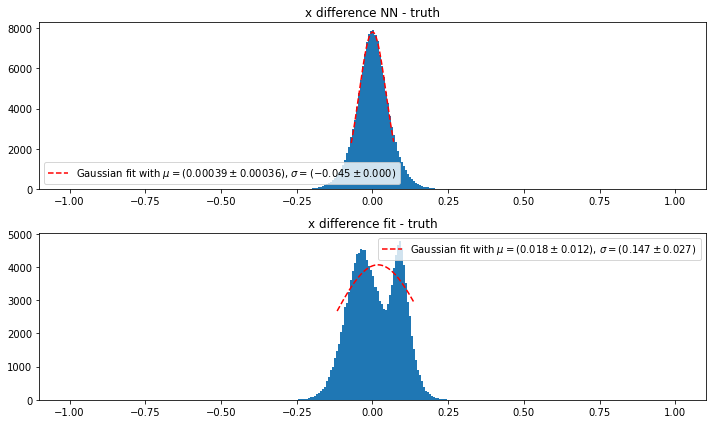

(array([ 3.91873868e-04, -4.49669209e-02,  8.78987467e+02]),
 array([3.60088001e-04, 4.72770485e-04, 7.44281410e+00]),
 array([1.81492238e-02, 1.47273906e-01, 1.50082019e+03]),
 array([1.16207866e-02, 2.74487209e-02, 2.33705322e+02]))

In [18]:
histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x")

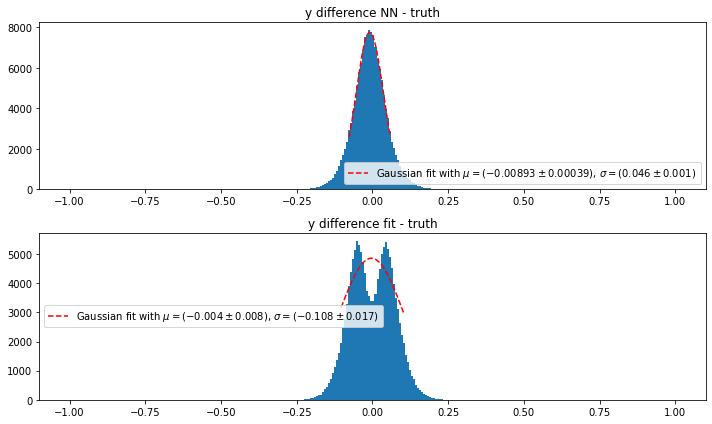

(array([-8.93231346e-03,  4.56017905e-02,  8.86337097e+02]),
 array([3.85509046e-04, 5.23360634e-04, 8.15169714e+00]),
 array([-3.59335380e-03, -1.07901939e-01,  1.31559350e+03]),
 array([7.84167892e-03, 1.66460001e-02, 1.64990425e+02]))

In [19]:
histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

In [ ]:
keras.models.save_model(model1, 'stage1model_lr0.00001')

<h2> summary </h2>

| (x/y) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simplest model $\alpha=0.005$ |0.035 / 0.040 | 0.054 / 0.044 |
| simplest model & standardization $\alpha=0.005$ | 0.047 / 0.048  | 0.044 / 0.045 |
| simplest model & standardization & $\alpha=0.001$, 50 epochs| 0.076 / 0.013  | 0.045 / 0.046 |
| simplest model & standardization & $\alpha=0.001$, 200 epochs| 0.014 / 0.034  | 0.042 / 0.043 |
| simplest model & standardization & $\alpha=0.0001$, 200 epochs| 0.010 / 0.011  | 0.040 / 0.038 |
| simplest model & standardization & $\alpha=0.01$, 50 epochs| divergence  | divergence |
| simplest model & standardization & $\alpha=0.00001$, 200 epochs| 0.00039 / 0.00893  | 0.045 / 0.046 |